In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd

### Physics Behind Fragments

This Notebook will be used to give a good estimation to fragment velocities for different sized fragments. This notebook will also be used to get a "feel" for velocitities of fragments. This analysis will be very low level and be realtively simple.

According to Newton Laws of motion, An object will remain at rest unless acted on by a force. This will be the basis of this analysis.

$F_{net}=MA$

We can create a free body diagram to understand all the forces the fragment experiences once an explosion happens.

The main force would be the force propelling the fragment which comes from the chamber pressure. This force is usually made up of the blast obverpressure decay data which can give us a dynamic pressure which then propels the fragment. However for the purposes of this analysis, it is decided to just use the pressure experienced at the time of explosion.

The two secondary forces are the same for any object moving through a fluid. the first being the drag force which is the resistance of an object flowing through the medium. THe second force is the gravitational force that all objects experience.

<img src="fragment free body.PNG">

Now that we understand what forces are acting on the fragment. We can find the net force acting on the fragment.
$F_{net} = P_{Chamber}A - \frac{C_{D}A \rho V^2}{2} - mg$

We can now plug the net force equation into the newtons equation

$ P_{Chamber}A - \frac{C_{D}A \rho V^2}{2} - mg = m \frac{dV}{dt}$

Now we can solve for $\frac{dV}{dt}$

$\frac{dV}{dt} = \frac{P_{Chamber}A}{m} - \frac{C_{D}A\rho V^{2}}{2m} - g$

This is the velocity equation which will be used later.

### ODE from above

In [96]:
def Velocity(P,A,rho,cd,m,t,v): 
    return PA - ((cd*(V**2)*A*rho)/(2*m))-g

### Pressure, Radius,Thickness, CD, and Density

In [128]:
# Array for pressure (specfied from mike) by a psi
Psi =np.array([200,450,1000,10000,100000,1000000,1500000])
#print(len(Psi))

#array for Radius (0.04903-0.00064516m) by number of pressures
interval = (0.04903-0.00064516)/len(Psi)
r = np.array(np.arange(0.00064516,0.04903,(interval)))
             
#Density will be held as constant for now (SS304)
rho = 8000 #kg/m^3
             
#Acceleration due to gravity
g = 9.81 #m/s^2

#thickness is from sch 10 SS304
th = 4.19/1000 #m (mm to m)

#Cd is from https://sv.20file.org/up1/916_0.pdf conclsion section
cd = 1.21 #dimsonless

### Finding Area, Volume, and Mass

In [153]:
def Area(r):
    A = np.pi * (r**2)
    return A

def Area_ft(r):
    A = np.pi * (r**2) * 3.2808399
    return A

def Volume(r,th):
    Vol=np.pi*(r**2)*th
    return Vol

def Mass(Vol,rho):
    M = Vol * rho
    return M

#Calculate the Area for all Radii
i=0
A = np.zeros(len(r))
A_ft = np.zeros(len(r))
for i in range(0,len(r)):
    A[i]=Area(r[i])
    i=i+1
for i in range(0,len(r)):
    A_ft[i] =Area_ft(r[i])
    i=i+1


#Calculate the Volume for all Radii
i=0
Vol = np.zeros(len(r))
for i in range(0,len(r)):
    Vol[i] = Volume(r[i],th)
    i=i+1

#Calculate the Mass of each fragment
i=0
M = np.zeros(len(Vol))
for i in range(0,len(Vol)):
    M[i] = Mass(Vol[i],rho)
    i=i+1
#print(A)
#print(M)

for i in range(len(A)):
    check = A[i]/(M[i])
    print(check)
    i=i+1

0.029832935560859187
0.029832935560859187
0.029832935560859187
0.029832935560859187
0.02983293556085919
0.029832935560859187
0.029832935560859187


### Changing Pressure (psi to Pa)

In [130]:
def Psi_to_Pa(Psi):
    P = Psi * 6894.76
    return P

i=0
P = np.zeros(len(Psi))
for i in range(0,len(Psi)):
    P[i] = Psi_to_Pa(Psi[i])
    i=i+1
print(P)

[1.378952e+06 3.102642e+06 6.894760e+06 6.894760e+07 6.894760e+08
 6.894760e+09 1.034214e+10]


### Finding $Acceleration$

$F_{net}$ for the first case will just be the chamber pressure. Therefore, $F_{net} = P_{Chamber}A$. Then we take the net force and divide it by Mass to get acceleration $ \frac{F_{net}}{M} = a$

In [143]:
def Acceleration(P,A,M):
    Accel=np.zeros(len(A))
    for i in range(0,len(A)):
        Acc = (P * A[i])/M[i]
        Accel[i] = Acc
        i=i+1
    return Accel
accel_200 = Acceleration(P[0],A,M)
print(accel_200)
accel_450 = Acceleration(P[1],A,M)
accel_1000 = Acceleration(P[2],A,M)
accel_10000 = Acceleration(P[3],A,M)
accel_100000 = Acceleration(P[4],A,M)
accel_1000000 = Acceleration(P[5],A,M)
accel_1500000 = Acceleration(P[6],A,M)

[41138.18615752 41138.18615752 41138.18615752 41138.18615752
 41138.18615752 41138.18615752 41138.18615752]


### Now lets solve for Velocity

THis is a very simple integral to solve for. After the integral is complete, you should find that

$v = \frac{F}{M} * t + C$

Now you to get rid of the C all we have to do is use the initial condition that at time 0 before the tank breaks, the velocity is obvisouly 0. Therefor....

$v = \frac{F}{M} * t $

In [174]:
t = 0.001
def Velocity_m(Accel,t):
    Velocity_m = np.zeros(len(Accel))
    for i in range(0,len(Accel)):
        Velocity_m[i] = (Accel[i]*t)
        i=i+1
    return Velocity_m

Velm_200 = Velocity_m(accel_200,t)
Velm_450 = Velocity_m(accel_450,t)
Velm_1000 = Velocity_m(accel_1000,t)
Velm_10000 = Velocity_m(accel_10000,t)
Velm_100000 = Velocity_m(accel_100000,t)
Velm_1000000 = Velocity_m(accel_1000000,t)
Velm_1500000 = Velocity_m(accel_1500000,t)

In [175]:
def Velocity_ft(Accel,t):
    Velocity_ft = np.zeros(len(Accel))
    for i in range(0,len(Accel)):
        Velocity_ft[i] = (Accel[i]*t)*3.2808399
        i=i+1
    return  Velocity_ft

Velft_200 = Velocity_ft(accel_200,t)
Velft_450 = Velocity_ft(accel_450,t)
Velft_1000 = Velocity_ft(accel_1000,t)
Velft_10000 = Velocity_ft(accel_10000,t)
Velft_100000 = Velocity_ft(accel_100000,t)
Velft_1000000 = Velocity_ft(accel_1000000,t)
Velft_1500000 = Velocity_ft(accel_1500000,t)

### SOLVE ODE

In [176]:
#PA = P[10000]*A[1]
#K = (cd*A[1]*rho)/(2*M[1])

In [177]:
#def Velocity(t,y): 
    #return PA - K*(y**2)-g

In [178]:
#sol = solve_ivp(Velocity,[0,1], [0], t_eval=np.linspace(0,1,100))
#print(sol.t)
#print(sol.y)

### Creating Excel Sheet

In [179]:
df = pd.DataFrame({'200 psi' : Velm_200, '450 psi' : Velm_450 ,
                  '1,000 psi' : Velm_1000 , '10,000 Psi' : Velm_10000 ,
                   '100,000 psi' : Velm_100000 , '1,000,000 psi' : Velm_1000000 ,
                  '1,500,000 psi' : Velm_1500000}, index = A)
df2 = pd.DataFrame({'200 psi' : Velft_200, '450 psi' : Velft_450 ,
                  '1,000 psi' : Velft_1000 , '10,000 Psi' : Velft_10000 ,
                   '100,000 psi' : Velft_100000 , '1,000,000 psi' : Velft_1000000 ,
                  '1,500,000 psi' : Velft_1500000})

df.to_excel("Initial_Vel_Frag_Analysis.xlsx")
df2.to_excel("Initial_Velft_Frag_Analysis.xlsx")
print(df)

            200 psi    450 psi   1,000 psi   10,000 Psi   100,000 psi  \
0.000001  41.138186  92.560919  205.690931  2056.909308  20569.093079   
0.000179  41.138186  92.560919  205.690931  2056.909308  20569.093079   
0.000658  41.138186  92.560919  205.690931  2056.909308  20569.093079   
0.001436  41.138186  92.560919  205.690931  2056.909308  20569.093079   
0.002515  41.138186  92.560919  205.690931  2056.909308  20569.093079   
0.003894  41.138186  92.560919  205.690931  2056.909308  20569.093079   
0.005573  41.138186  92.560919  205.690931  2056.909308  20569.093079   

          1,000,000 psi  1,500,000 psi  
0.000001  205690.930788  308536.396181  
0.000179  205690.930788  308536.396181  
0.000658  205690.930788  308536.396181  
0.001436  205690.930788  308536.396181  
0.002515  205690.930788  308536.396181  
0.003894  205690.930788  308536.396181  
0.005573  205690.930788  308536.396181  


### Create Graphs

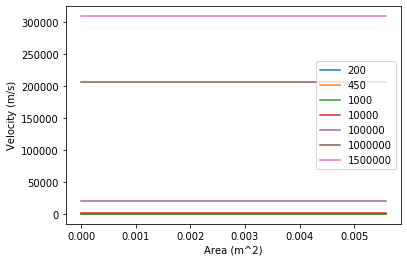

In [180]:
plt.plot(A, df)
plt.ylabel("Velocity (m/s)")
plt.xlabel("Area (m^2)")
plt.legend(Psi)
plt.show()

### Change Velocity from m/s to ft/s

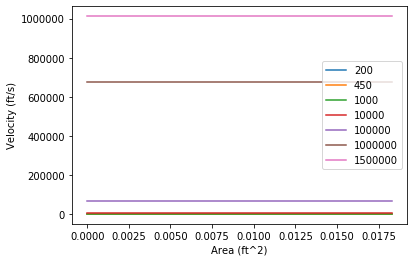

[674.8390128 674.8390128 674.8390128 674.8390128 674.8390128 674.8390128
 674.8390128]
[6748.39012796 6748.39012796 6748.39012796 6748.39012796 6748.39012796
 6748.39012796 6748.39012796]


In [185]:
plt.plot(A_ft, df2)
plt.ylabel("Velocity (ft/s)")
plt.xlabel("Area (ft^2)")
plt.legend(Psi)
plt.show()
#print(Velft_200)
#print(Velft_450)
print(Velft_1000)
print(Velft_10000)
#print(Velft_100000)

From the COMET Program, The velocities we measured were often times 50-100 ms after the explosion which makes them hard to compare with inital fragments. However, There were a couple of points that happened less than 15 ms after the explosion which can be more useful in comparing our calculations to. The values of the velocities we measured ranged from 2,000 ft/s to 9,000 ft/s. Using this information we can see that our velocities are falling in the low end of the pressures (1,000 - 10,000 psi).

### Lets solve for time of acceleration of fragments

In [182]:
########CONSTANTS##############
A_1 = 76.83 #in^2 average from test 9 fragments
thickness = 0.38 #in from average test 9 fragment
dens = 8000 #kg/m^3
V_1 = 9000 #fastest and earliest fragment from test 5 ft/s
##################################

##########FUNCTIONS################
def ins_ms(A_1):
    A = A_1*0.00064516
    return A
def ftps_mps(V_1):
    V = V_1*0.3048
    return V
def in_m(thickness_1):
    thickness = thickness_1*0.0254
    return thickness

####################################

############SI UNITS BELOW###############
A_1 = ins_ms(A_1) #m^2
V_1 = ftps_mps(V_1) #m/s
thickness = in_m(thickness) #m

#############Calculations#################
M_1 = (A_1*thickness)*rho
t = np.zeros(len(P))
i=0
print(len(t))
for i in range(len(P)):
    t[i] = (V_1*M_1)/(P[i]*A_1)
    i = i+1
print(t)
print(P)

7
[1.53608633e-01 6.82705034e-02 3.07217265e-02 3.07217265e-03
 3.07217265e-04 3.07217265e-05 2.04811510e-05]
[1.378952e+06 3.102642e+06 6.894760e+06 6.894760e+07 6.894760e+08
 6.894760e+09 1.034214e+10]


Pressure (Psi)  Time of Contact (s)
                0
200      0.153609
450      0.068271
1000     0.030722
10000    0.003072
100000   0.000307
1000000  0.000031
1500000  0.000020


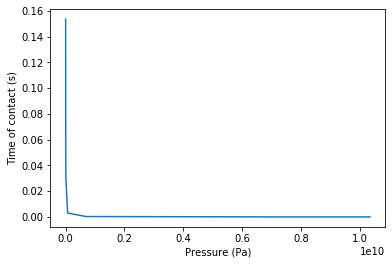

In [183]:
print('Pressure (Psi) ', 'Time of Contact (s)')
df3= pd.DataFrame(t, index = Psi)
print(df3)
df3.to_excel("time_of_Accel_Frag.xlsx")
plt.plot(P,df3)
plt.ylabel("Time of contact (s)")
plt.xlabel("Pressure (Pa)")
plt.show()

### Note

From my calculations it would seem as though the inital chamber pressure that the fragments are subjected to seem to infulence the fragments velocities lineraly. You can see as the chamber pressure increases in the tanks the contact time or the time of accleretaion of the fragments significantly decreases.  However this was a simple ideal case of the fragments. It does not take into account drag forces and dynamic pressure forces. These will need to be added for a more accurate model of fragment intial velocities.